# Probability and an Introduction to Jupyter, Python and Pandas

### 29th September 2015 Neil Lawrence

Welcome to the Machine Learning and Adaptive Intelligence course. In this course we will introduce the basic concepts of machine learning and data science. In particular we will look at tools and techniques that describe how to model. An integrated part of that is how we approach data with the computer. We are choosing to do that with the tool you see in front of you: the Jupyter Notebook. 

The notebook provides us with a way of interacting with the data that allows us to give the computer instructions and explore the nature of a data set. It is *different* to normal coding, but it is related. In this course you will, through intensive practical sessions and labs, develop your understanding of the interaction between data and computers. 

The first thing we are going to do is ask you to forget a bit about what you think about normal programming, or 'classical software engineering'. Classical software engineering demands a large amount of design and testing. In data analysis, testing remains very important, but the design is often evolving. The design evolves through a process known as *exploratory data analysis*. You will learn some of the techniques of exploratory data analysis in this course.

A particular difference between classical software engineering and data analysis is the way in which programs are run. Classically we spend a deal of time working with a text editor, writing code. Compilations are done on a regular basis and aspects of the code are tested (perhaps with unit tests). 

Data analysis is more like coding in a debugger. In a debugger (particularly a visual debugger) you interact with the data stored in the memory of the computer to try and understand what is happening in the computer, you need to understand exactly what your bug is: you often have a fixed idea of what the program is trying to do, you are just struggling to find out why it isn't doing it. 

Naturally, debugging is an important part of data analysis also, but in some sense it can be seen as its entire premise. You load in a data set into a computer that you don't understand, your entire objective is to understand the data. This is best done by interogating the data to visualise it or summarize it, just like in a power visual debugger. However, for data science the requirements for visualization and summarization are far greater than in a regular program. When the data is well understood, the actual number of lines of your program may well be very few (particularly if you disregard commands that load in the data and commands which plot your results). If a powerful data science library is available, you may be able to summarize your code with just two or three lines, but the amount of intellectual energy that is expended on writing those three lines is far greater than in standard code.

In the first lecture we will think a little about 'how we got here' in terms of computer science. In the lecture itself, this will be done by taking a subjective perspective, that of my own 'data autobiography'.

## Assumed Knowledge

### Linear Algebra, Probability and Differential Calculus

We will be assuming that you have good background in maths. In particular we will be making use of linear algrebra (matrix operations including inverse, inner products, determinant etc), probability (sum rule of probability, product rule of probability), and the calculus of differentiation (and integration!). A new concept for the course is multivariate differentiation and integration. This combines linear algebra and differential calculus. These techniques are vital in understanding probability distributions over high dimensional distributions. 

### Choice of Language

In this course we will be using Python for our programming language. A prerequisite of attending this course is that you have learnt at least one programming language in the past. It is not our objective to teach you python. At Level 4 and Masters we expect our students to be able pick up a language as they go. If you have not experienced python before it may be worth your while spending some time understanding the language. There are resources available for you to do this [here](https://docs.python.org/2/tutorial/) that are based on the standard console. An introduction to the Jupyter notebook (formerly known as the IPython notebook) is available [here](http://ipython.org/ipython-doc/2/notebook/index.html). 

### Assignment Question 1

Who invented python and why? What was the language designed to do? What is the origin of the name "python"? Is the language a compiled language? Is it an object orientated language?

*10 marks*

#### Question 1 Answer

Python, firstly released in 1991, was invented by Guido van Rossum. It started out as a personal project, where van Rossum wanted to implement an interpreter he had been thinking about for some time. The language was designed to appeal to Unix/C hackers of the time. It is geared towards code readability and fast prototyping.

Python's inventor was an avid Monty Python fan and that is mainly how the language got its name (as per van Rossum himself, he was at the time in an "irreverent mood").

Python is not a compiled, but an interpreted language. It supports multiple programming paradigms, like object-oriented, functional and imperative programming.

---

Information taken from the [Python Wikipedia article](https://en.wikipedia.org/wiki/Python_(programming_language)).

## Choice of Environment

We are working in the Jupyter notebook (formerly known as the IPython notebook). It provides an environment for interacting with data in a natural way which is reproducible. We will be learning how to make use of the notebook throughout the course. The notebook allows us to combine code with descriptions, interactive visualizations, plots etc. In fact it allows us to do many of the things we need for data science. Notebooks can also be easily shared through the internet for ease of communication of ideas. The box this text is written in is a *markdown* box. Below we have a *code* box.

In [1]:
print("This is the Jupyter notebook")
print("It provides a platform for:")
words = ['Open', 'Data', 'Science']
from random import shuffle
for i in range(3):
    shuffle(words)
    print(' '.join(words))

This is the Jupyter notebook
It provides a platform for:
Open Science Data
Open Science Data
Science Open Data


Have a play with the code in the above box. Think about the following questions: what is the difference between `CTRL-enter` and `SHIFT-enter` in running the code? What does the command `shuffle` do? Can you find out by typing `shuffle?` in a code box?
Once you've had a play with the code we can load in some data using the `pandas` library for data analysis. 

## Movie Body Count Example

There is a crisis in the movie industry, deaths are occuring on a massive scale. In every feature film the body count is tolling up. But what is the cause of all these deaths? Let's try and investigate.

For our first example of data science, we take inspiration from work by [researchers at NJIT](http://www.theswarmlab.com/r-vs-python-round-2/). They researchers were comparing the qualities of Python with R (my brief thoughts on the subject are available in a Google+ post here: https://plus.google.com/116220678599902155344/posts/5iKyqcrNN68). They put together a data base of results from the  the "Internet Movie Database" and the [Movie Body Count](http://www.moviebodycounts.com/) website which will allow us to do some preliminary investigation.

We will make use of data that has already been 'scraped' from the [Movie Body Count](http://www.moviebodycounts.com/) website. Code and the data is available at [a github repository](https://github.com/sjmgarnier/R-vs-Python/tree/master/Deadliest%20movies%20scrape/code). Git is a version control system and github is a website that hosts code that can be accessed through git. By sharing the code publicly through github, the authors are licensing the code publicly and allowing you to access and edit it. As well as accessing the code via github you can also [download the zip file](https://github.com/sjmgarnier/R-vs-Python/archive/master.zip). But let's do that in python

In [2]:
import pods
pods.util.download_url('https://github.com/sjmgarnier/R-vs-Python/archive/master.zip')

[....                          ]   1.469MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Once the data is downloaded we can unzip it into the same directory where we are running the lab class. 

In [3]:
import zipfile
zip = zipfile.ZipFile('./master.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

In [4]:
import pandas as pd # import the pandas library into a namespace called pd
film_deaths = pd.read_csv('./R-vs-Python-master/Deadliest movies scrape/code/film-death-counts-Python.csv')

Once it is loaded in the data can be summarized using the `describe` method in pandas.


In [5]:
film_deaths.describe()

,Year,Body_Count,Length_Minutes,IMDB_Rating
count,421.000000,421.000000,421.000000,421.000000
mean,1996.491686,53.287411,115.427553,6.882898
std,10.913210,82.068035,21.652287,1.110788
min,1949.000000,0.000000,79.000000,2.000000
25%,1991.000000,11.000000,100.000000,6.200000
50%,2000.000000,28.000000,111.000000,6.900000
75%,2005.000000,61.000000,127.000000,7.700000
max,2009.000000,836.000000,201.000000,9.300000


In jupyter and jupyter notebook it is possible to see a list of all possible functions and attributes by typing the name of the object followed by .<Tab> for example in the above case if we type film_deaths.<Tab> it show the columns available (these are attributes in pandas dataframes) such as Body_Count, and also functions, such as .describe().

For functions we can also see the documentation about the function by following the name with a question mark. This will open a box with documentation at the bottom which can be closed with the x button.

In [6]:
film_deaths.describe?

In [7]:
print(film_deaths['Year'])
#print(film_deaths['Body_Count'])

0      2002
1      2007
2      2006
3      1999
4      1971
5      1988
6      1988
7      1990
8      2005
9      1988
10     2002
11     1979
12     2007
13     2006
14     1980
15     2007
16     1985
17     1981
18     2000
19     1993
20     1998
21     1979
22     2006
23     2008
24     1998
25     1992
26     1976
27     2005
28     2007
29     2002
       ... 
391    1995
392    2005
393    2008
394    2005
395    2000
396    1983
397    1985
398    2006
399    2007
400    2004
401    2007
402    2008
403    2005
404    2001
405    2000
406    2002
407    1968
408    1969
409    2000
410    2003
411    2006
412    2002
413    2005
414    1974
415    2000
416    2007
417    1967
418    2007
419    2001
420    1964
Name: Year, Length: 421, dtype: int64


This shows the number of deaths per film across the years. We can plot the data as follows.

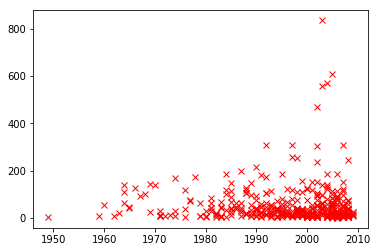

In [8]:
# this ensures the plot appears in the web browser
%matplotlib inline
import pylab as plt # this imports the plotting library in python

plt.plot(film_deaths['Year'], film_deaths['Body_Count'], 'rx')

You may be curious what the arguments we give to plt.plot are for, now is the perfect time to look at the documentation

In [9]:
plt.plot?

We immediately note that some films have a lot of deaths, which prevent us seeing the detail of the main body of films. First lets identify the films with the most deaths.

In [10]:
film_deaths[film_deaths['Body_Count']>200]

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
60,Dip huet gaai tau,1990,214,NaN,Crime|Drama|Thriller,John Woo,Tony Leung Chiu Wai|Jacky Cheung|Waise Lee|Sim...,136,7.7
117,Equilibrium,2002,236,R,Action|Drama|Sci-Fi|Thriller,Kurt Wimmer,Christian Bale|Dominic Purcell|Sean Bean|Chris...,107,7.6
154,Grindhouse,2007,310,R,Action|Horror|Thriller,Robert Rodriguez|Eli Roth|Quentin Tarantino|Ed...,Kurt Russell|Zoë Bell|Rosario Dawson|Vanessa F...,191,7.7
159,Lat sau san taam,1992,307,R,Action|Crime|Drama|Thriller,John Woo,Yun-Fat Chow|Tony Leung Chiu Wai|Teresa Mo|Phi...,128,8.0
193,Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,Martin Hancock|Michael Sheen|Nathalie Cox|Eriq...,144,7.2
206,The Last Samurai,2003,558,R,Action|Drama|History|War,Edward Zwick,Ken Watanabe|Tom Cruise|William Atherton|Chad ...,154,7.7
222,The Lord of the Rings: The Two Towers,2002,468,PG-13,Action|Adventure|Fantasy,Peter Jackson,Bruce Allpress|Sean Astin|John Bach|Sala Baker...,179,8.8
223,The Lord of the Rings: The Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,Noel Appleby|Alexandra Astin|Sean Astin|David ...,201,8.9
291,Rambo,2008,247,R,Action|Thriller|War,Sylvester Stallone,Sylvester Stallone|Julie Benz|Matthew Marsden|...,92,7.1
317,Saving Private Ryan,1998,255,R,Action|Drama|War,Steven Spielberg,Tom Hanks|Tom Sizemore|Edward Burns|Barry Pepp...,169,8.6


Here we are using the command `film_deaths['Body_Count']>200` to index the films in the pandas data frame which have over 200 deaths. To sort them in order we can also use the `sort` command. The result of this command on its own is a data series of `True` and `False` values. However, when it is passed to the `film_deaths` data frame it returns a new data frame which contains only those values for which the data series is `True`. We can also sort the result. To sort the result by the values in the `Body_Count` column in *descending* order we use the following command.

In [11]:
film_deaths[film_deaths['Body_Count']>200].sort_values('Body_Count', ascending=False)

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
223,The Lord of the Rings: The Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,Noel Appleby|Alexandra Astin|Sean Astin|David ...,201,8.9
193,Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,Martin Hancock|Michael Sheen|Nathalie Cox|Eriq...,144,7.2
382,Troy,2004,572,R,Adventure|Drama,Wolfgang Petersen,Julian Glover|Brian Cox|Nathan Jones|Adoni Mar...,163,7.2
206,The Last Samurai,2003,558,R,Action|Drama|History|War,Edward Zwick,Ken Watanabe|Tom Cruise|William Atherton|Chad ...,154,7.7
222,The Lord of the Rings: The Two Towers,2002,468,PG-13,Action|Adventure|Fantasy,Peter Jackson,Bruce Allpress|Sean Astin|John Bach|Sala Baker...,179,8.8
154,Grindhouse,2007,310,R,Action|Horror|Thriller,Robert Rodriguez|Eli Roth|Quentin Tarantino|Ed...,Kurt Russell|Zoë Bell|Rosario Dawson|Vanessa F...,191,7.7
159,Lat sau san taam,1992,307,R,Action|Crime|Drama|Thriller,John Woo,Yun-Fat Chow|Tony Leung Chiu Wai|Teresa Mo|Phi...,128,8.0
375,Titanic,1997,307,PG-13,Drama|Romance,James Cameron,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,194,7.7
406,We Were Soldiers,2002,305,R,Action|Drama|History|War,Randall Wallace,Mel Gibson|Madeleine Stowe|Greg Kinnear|Sam El...,138,7.1
349,Starship Troopers,1997,256,R,Action|Sci-Fi,Paul Verhoeven,Casper Van Dien|Dina Meyer|Denise Richards|Jak...,129,7.2


We now see that the 'Lord of the Rings' is a large outlier with a very large number of kills. We can try and determine how much of an outlier by histograming the data. 

### Plotting the Data

Text(0.5,1,'Histogram of Film Kill Count')

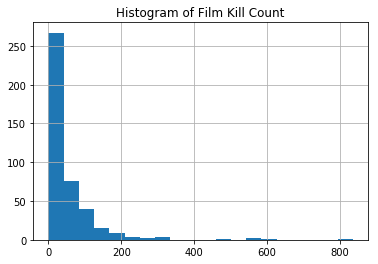

In [12]:
film_deaths['Body_Count'].hist(bins=20) # histogram the data with 20 bins.
plt.title('Histogram of Film Kill Count')

### Assignment Question 2 
Read on the internet about the following python libraries: `numpy`, `matplotlib`, `scipy` and `pandas`. What functionality does each provide in python. What is the `pylab` library and how does it relate to the other libraries?

*10 marks*

#### Question 2 Answer

`numpy`: This is a library that provides advanced and efficient mathematical computations to Python, mostly in the field of Linear Algebra, where the library provides its own multi-dimensional array structures. (http://www.numpy.org/)

`matplotlib`: A library for plotting and visualizations of data. (https://matplotlib.org/)

`scipy`: A library that provides tools for mathematical and scientific computing, from statistical functions to signal processing. (https://www.scipy.org/)

`pandas`: This library provides an easy to use data processing framework. Data can be stored in `pandas` data structures (eg. `DataFrame`) from where it can be queried with statistical and database-related functions. (https://pandas.pydata.org/)

`pylab`: A programming environment that is built to turn Python into an efficient computing tool. This environment is made up of many third-party libraries, including the ones above. Its name comes from combining Python with Matlab (PyLab). (https://scipy.github.io/old-wiki/pages/PyLab)

We could try and remove these outliers, but another approach would be to plot the logarithm of the counts against the year.

Text(0.5,0,'year')

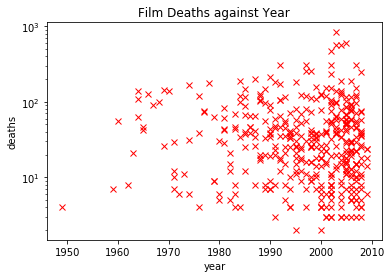

In [13]:
plt.plot(film_deaths['Year'], film_deaths['Body_Count'], 'rx')
ax = plt.gca() # obtain a handle to the current axis
ax.set_yscale('log') # use a logarithmic death scale
# give the plot some titles and labels
plt.title('Film Deaths against Year')
plt.ylabel('deaths')
plt.xlabel('year')

Note a few things. We are interacting with our data. In particular, we are replotting the data according to what we have learned so far. We are using the progamming language as a *scripting* language to give the computer one command or another, and then the next command we enter is dependent on the result of the previous. This is a very different paradigm to classical software engineering. In classical software engineering we normally write many lines of code (entire object classes or functions) before compiling the code and running it. Our approach is more similar to the approach we take whilst debugging. Historically, researchers interacted with data using a *console*. A command line window which allowed command entry. The notebook format we are using is slightly different. Each of the code entry boxes acts like a separate console window. We can move up and down the notebook and run each part in a different order. The *state* of the program is always as we left it after running the previous part.  

### Assignment Question 3

What is jupyter and why was it invented? Give some examples of functionality it gives over standard python. What is the jupyter project? Name two languages involved in the Jupyter project other than python.

*10 marks*

#### Question 3 Answer

##### What and Why?

A Jupyter Notebook is a web application that allows sharing of code, results, visualizations and explanatory text. It is built to support scientific and academic computing around the globe, open to everyone.

##### Functionality

One of the main advantages of using a Jupyter Notebook over regular Python is that we do not have to run a whole script every time we make a change. Instead, with a Notebook, we can segment a script into multiple cells and run them separately. So, if we make a change at a later cell, we do not need to run all the cells from the top (we may need to, though, in some cases). For example, in a notebook we can load a dataset with one cell and then experiment on it with later cells. We can modify these cells as much as we want, without the need to reload the data.

Another advantage is that visualizations are more streamlined. In regular Python visualizations, we get to see them as the script is ran. Thus, we have to examine visualizations in the order they are generated and after a visualization is shown, we cannot see it again without rerunning the script. In Jupyter Notebooks, this is not the case. When we plot a graph, it stays in the page for later viewing. We can then generate multiple visualizations and view them at the same time.

We can also write text in between code cells, in Markdown cells. This enables us to provide user friendly documentation and notes on our code and its results.

Combining all the above, we can write easy to read notebooks that can be shared with others for educational or business purposes. This makes prototyping and putting ideas down easy and intuitive.

##### What is the Jupyter Project?

It is an open-source project for providing interactive tools for efficient collaboration and communication.

##### Other Languages

Jupyter supports, apart from Python, many languages. Two of these languages are R and Scala.

---

Information taken from the [official Jupyter website](http://jupyter.org/).

## Probabilities

We are now going to do some simple review of probabilities and use this review to explore some aspects of our data.

A probability distribution expresses uncertainty about the outcome of an event. We often encode this uncertainty in a variable. So if we are considering the outcome of an event, $Y$, to be a coin toss, then we might consider $Y=1$ to be heads and $Y=0$ to be tails. We represent the probability of a given outcome with the notation:
$$
P(Y=1) = 0.5
$$
The first rule of probability is that the probability must normalize. The sum of the probability of all events must equal 1. So if the probability of heads ($Y=1$) is 0.5, then the probability of tails (the only other possible outcome) is given by
$$
P(Y=0) = 1-P(Y=1) = 0.5
$$

Probabilities are often defined as the limit of the ratio between the number of positive outcomes (e.g. *heads*) given the number of trials. If the number of positive outcomes for event $y$ is denoted by $n_y$ and the number of trials is denoted by $N$ then this gives the ratio 
$$
P(Y=y) = \lim_{N\rightarrow \infty}\frac{n_y}{N}.
$$
In practice we never get to observe an event infinite times, so rather than considering this we often use the following estimate
$$
P(Y=y) \approx \frac{n_y}{N}.
$$
Let's use this rule to compute the approximate probability that a film from the movie body count website has over 40 deaths.

In [14]:
deaths = (film_deaths.Body_Count>40).sum()  # number of positive outcomes (in sum True counts as 1, False counts as 0)
total_films = film_deaths.Body_Count.count()
prob_death = float(deaths)/float(total_films)
print("Probability of deaths being greather than 40 is:", prob_death)

Probability of deaths being greather than 40 is: 0.37767220902612825


### Assignment Question 4

We now have an estimate of the probability a film has greater than 40 deaths. The estimate seems quite high. What could be wrong with the estimate? Do you think any film you go to in the cinema has this probability of having greater than 40 deaths?

Why did we have to use `float` around our counts of deaths and total films? What would the answer have been if we hadn't used the `float` command? If we were using Python 3 would we have this problem?

*20 marks*

#### Question 4 Answer

The number of films with more than 40 deaths is 159 while the total number of films is 421 (shown below).

So the issue lies in the quality and distribution of our data. It seems that the collectors of the data worked with movies that have high body counts and this skews the above estimation. The above estimation is not an estimation for *all* movies, but for movies in the particular dataset, which may not be representative of reality.

Indeed, if we take a look at the dataset, pretty much all movies have at least one death, which is not indicative of all movies.

Therefore, the problem lies with the dataset, which is not a good approximation of all movies (maybe the researchers simply collected action movies for this experiment).

In Python 2, the `float` conversion is needed, as otherwise the result would become an integer and we would lose accuracy. In Python 3 this is no longer needed, as shown below where the `float` conversions are removed.

In [15]:
(film_deaths.Body_Count>40).sum()

159

In [16]:
film_deaths.Body_Count.count()

421

In [17]:
(film_deaths.Body_Count>0).sum()

418

In [18]:
deaths = (film_deaths.Body_Count>40).sum()  # number of positive outcomes (in sum True counts as 1, False counts as 0)
total_films = film_deaths.Body_Count.count()
prob_death = deaths/total_films
print("Probability of deaths being greather than 40 is:", prob_death)

Probability of deaths being greather than 40 is: 0.37767220902612825


# Conditioning

When predicting whether a coin turns up head or tails, we might think that this event is *independent* of the year or time of day. If we include an observation such as time, then in a probability this is known as *conditioning*. We use this notation, $P(Y=y|T=t)$, to condition the outcome on a second variable (in this case time). Or, often, for a shorthand we use $P(y|t)$ to represent this distribution (the $Y=$ and $T=$ being implicit). Because we don't believe a coin toss depends on time then we might write that 
$$
P(y|t) = p(y).
$$
However, we might believe that the number of deaths is dependent on the year. For this we can try estimating $P(Y>40 | T=2000)$ and compare the result, for example to $P(Y>40|2002)$ using our empirical estimate of the probability.

In [19]:
for year in [2000, 2002]:
    deaths = (film_deaths.Body_Count[film_deaths.Year==year]>40).sum()
    total_films = (film_deaths.Year==year).sum()

    prob_death = float(deaths)/float(total_films)
    print("Probability of deaths being greather than 40 in year", year, "is:", prob_death)

Probability of deaths being greather than 40 in year 2000 is: 0.16666666666666666
Probability of deaths being greather than 40 in year 2002 is: 0.4074074074074074


### Assignment Question 5

Compute the probability for the number of deaths being over 40 for each year we have in our `film_deaths` data frame. Store the result in a `numpy` array and plot the probabilities against the years using the `plot` command from `matplotlib`. Do you think the estimate we have created of $P(y|t)$ is a good estimate? Write your code and your written answers in the box below.  

*20 marks*

Text(0.5,0,'year')

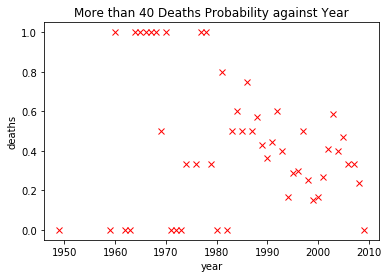

In [20]:
# Question 5 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.



# Calculating probabilities
import numpy as np

years = film_deaths.Year.unique() # Get unique year values
probs = np.empty((0)) # Init empty np array
for year in years:
    deaths = (film_deaths.Body_Count[film_deaths.Year==year]>40).sum()
    total_films = (film_deaths.Year==year).sum()
    probs = np.append(probs, deaths/total_films)


# Plotting
import matplotlib.pyplot as plt
plt.plot(years, probs, 'rx')
ax = plt.gca() # obtain a handle to the current axis
plt.title('More than 40 Deaths Probability against Year')
plt.ylabel('deaths')
plt.xlabel('year')

#### Question 5 Answer Text

In the above code, we first store all the unique year values into a `numpy` array, `years`. We also initialize another `numpy` array, `probs`, to store the calculated probabilities.

Then, using the code already provided above (with minor modifications, to parse through all the years instead of just two, and to store the probabilities instead of printing them) we calculate and store the probability of more than 40 deaths occuring in each year.

The accuracy of our estimation depends on the quality and quantity of our data. The more data we have, the more accurate our approximation will be, as the two values (real versus estimation) will converge.



(Below are shown the arrays `probs` and `years`)

In [21]:
probs

array([0.40740741, 0.33333333, 0.33333333, 0.15384615, 0.        ,
       0.57142857, 0.36363636, 0.47058824, 0.33333333, 0.        ,
       0.5       , 0.8       , 0.16666667, 0.4       , 0.25      ,
       0.23809524, 0.6       , 0.33333333, 0.28571429, 0.58823529,
       0.4       , 0.44444444, 0.42857143, 0.75      , 0.5       ,
       0.        , 0.3       , 0.26666667, 0.5       , 0.16666667,
       0.5       , 1.        , 0.        , 0.6       , 1.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.33333333, 1.        , 0.5       , 0.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ])

In [22]:
years

array([2002, 2007, 2006, 1999, 1971, 1988, 1990, 2005, 1979, 1980, 1985,
       1981, 2000, 1993, 1998, 2008, 1992, 1976, 1995, 2003, 2004, 1991,
       1989, 1986, 1987, 1982, 1996, 2001, 1983, 1994, 1997, 1978, 1962,
       1984, 1964, 1965, 2009, 1963, 1966, 1970, 1973, 1974, 1960, 1969,
       1959, 1972, 1977, 1949, 1968, 1967], dtype=int64)

#### Notes for Question 5

Make sure the plot is included in *this* notebook file (the `IPython` magic command `%matplotlib inline` we ran above will do that for you, it only needs to be run once per file).

### Rules of Probability

We've now introduced conditioning and independence to the notion of probability and computed some conditional probabilities on a practical example The scatter plot of deaths vs year that we created above can be seen as a *joint* probability distribution. We represent a joint probability using the notation $P(Y=y, T=t)$ or $P(y, t)$ for short. Computing a joint probability is equivalent to answering the simultaneous questions, what's the probability that the number of deaths was over 40 and the year was 2002? Or any other question that may occur to us. Again we can easily use pandas to ask such questions.


In [23]:
year = 2000
deaths = (film_deaths.Body_Count[film_deaths.Year==year]>40).sum()
total_films = film_deaths.Body_Count.count() # this is total number of films
prob_death = float(deaths)/float(total_films)
print("Probability of deaths being greather than 40 and year being", year, "is:", prob_death)

Probability of deaths being greather than 40 and year being 2000 is: 0.007125890736342043


### The Product Rule

This number is the joint probability, $P(Y, T)$ which is much *smaller* than the conditional probability. The number can never be bigger than the conditional probability because it is computed using the *product rule*.
$$
p(Y=y, T=t) = p(Y=y|T=t)p(T=t)
$$
and $$p(T=t)$$ is a probability distribution, which is equal or less than 1, ensuring the joint distribution is typically smaller than the conditional distribution.

The product rule is a *fundamental* rule of probability, and you must remember it! It gives the relationship between the two questions: 1) What's the probability that a film was made in 2002 and has over 40 deaths? and 2) What's the probability that a film has over 40 deaths given that it was made in 2002?

In our shorter notation we can write the product rule as
$$
p(y, t) = p(y|t)p(t)
$$
We can see the relation working in practice for our data above by computing the different values for $t=2000$.

In [24]:
p_t = float((film_deaths.Year==2002).sum())/float(film_deaths.Body_Count.count())
p_y_given_t = float((film_deaths.Body_Count[film_deaths.Year==2002]>40).sum())/float((film_deaths.Year==2002).sum())
p_y_and_t = float((film_deaths.Body_Count[film_deaths.Year==2002]>40).sum())/float(film_deaths.Body_Count.count())

print("P(t) is", p_t)
print("P(y|t) is", p_y_given_t)
print("P(y,t) is", p_y_and_t)

P(t) is 0.06413301662707839
P(y|t) is 0.4074074074074074
P(y,t) is 0.026128266033254157


### The Sum Rule

The other *fundamental rule* of probability is the *sum rule* this tells us how to get a *marginal* distribution from the joint distribution. Simply put it says that we need to sum across the value we'd like to remove.
$$
P(Y=y) = \sum_{t} P(Y=y, T=t)
$$
Or in our shortened notation
$$
P(y) = \sum_{t} P(y, t)
$$

### Assignment Question 6

Write code that computes $P(y)$ by adding $P(y, t)$ for all values of $t$. 

*10 marks*

In [25]:
# Question 6 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.



p_y, total_films = 0, film_deaths.Body_Count.count()
for year in years:
    # Calculate P(y, t)
    p_y_and_t = (film_deaths.Body_Count[film_deaths.Year==year]>40).sum() / total_films
    p_y += p_y_and_t # Add P(y, t) to overall probability, P(y)

print(p_y)

0.3776722090261285


## Bayes' Rule

Bayes rule is a very simple rule, it's hardly worth the name of a rule at all. It follows directly from the product rule of probability. Because $P(y, t) = P(y|t)P(t)$ and by symmetry $P(y,t)=P(t,y)=P(t|y)P(y)$ then by equating these two equations and dividing through by $P(y)$ we have
$$
P(t|y) = \frac{P(y|t)P(t)}{P(y)},
$$
which is known as Bayes' rule (or Bayes's rule, it depends how you choose to pronounce it). It's not difficult to derive, and its importance is more to do with the semantic operation that it enables. Each of these probability distributions represents the answer to a question we have about the world. Bayes rule (via the product rule) tells us how to *invert* the probability.

## Probabilities for Extracting Information from Data

What use is all this probability in data science? Let's think about how we might use the probabilities to do some decision making. Let's load up a little more information about the movies.

In [26]:
movies = pd.read_csv('./R-vs-Python-master/Deadliest movies scrape/code/film-death-counts-Python.csv')
movies.columns

Index(['Film', 'Year', 'Body_Count', 'MPAA_Rating', 'Genre', 'Director',
       'Actors', 'Length_Minutes', 'IMDB_Rating'],
      dtype='object')

### Assignment Question 7

Now we see we have several additional features including the quality rating (`IMDB_Rating`). Let's assume we want to predict the rating given the other information in the data base. How would we go about doing it? 

Using what you've learnt about joint, conditional and marginal probabilities, as well as the sum and product rule, how would you formulate the question you want to answer in terms of probabilities? Should you be using a joint or a conditional distribution? If it's conditional, what should the distribution be over, and what should it be conditioned on?

*20 marks*

#### Question 7 Answer Text

##### General Process

First, we need to analyze our data. This is a general process, but here we are mainly looking for correlation between our prediction target (`IMDB_Rating`) and the given features. For example, maybe particular actors have played roles in high scoring movies. Maybe, the more deaths a film has, the more highly rated it is. Analyzing and better understanding our data will help us understand in greater detail the problem at hand. Some of the information given may be useful, while other information may be less so.

After the analysis, we need to build a prediction model, using the information that we have deemed most useful (if we have the time and resources, it may be worth using less obvious information as well, or even engineering our own; for example, combining the `Actors` and `Director` columns into a single `People_Involved` column). In model building, we first need to settle on a particular type of model. Our task at hand is regression (trying to map features/information to a real value). There are many models available for this problem (for example, a linear regressor). When we have decided upon a model (keep in mind that, again, time/resource permitting we may still need to check other types of model as well), we need to train it. For this task, we are going to need to format our data so that it can be used in training. For example, we may need to normalize the `Body_Count` column so that all values lie in the `[0, 1]` range. We usually need to convert text data (like the name of the director) to numerical data, mapping each director name to a unique index. After this is done, we will feed the data to our model in order to train it. To get better results, we will quite probably need to tune the different parameters of our model training (for example, the learning rate, or the number of iterations). Finally, when the training is done, we can use our model to (hopefully) predict our target (`IMDB_Rating`).

##### Our problem in terms of probabilities

To predict the target rating, `IMDB_Rating` (denoted here by `R`), we are going to use conditional probabilities. These probabilities will be in the form `P(R | C_1, C_2, ..., C_n)`, where `C_1, ..., C_n` are the given values for each of the columns. What we are computing is essentially the distribution of rating values given the column values. This distribution function will let us know how probable each rating value is. With our model, we are aiming to approximate this distribution function as close as possible, using our data for training. When we have that function, we will be able to find the most likely rating. This can be done either mathematically, or by querying the function using all the possible values (because rating values actually form a discrete set; more on that later). Note that depending on the notation used, we may want to write `P(R | C_1, ..., C_n, X, T)`, where `(X, T)` is the training vector (`X` is the data and `T` the targets).

There reason we are using conditional probabilities to predict the target rating is because we already know the rest of the information. *Given* that information we want to learn the distribution of rating values.

If we had used the joint probability, `P(R, C_1, ..., C_n)`, we would be finding the distribution of all the variable values occurring at the same time, over all the possible combinations.

If we had taken the marginal probability `P(R)`, we would be making predictions on the overall distribution of ratings, without paying any attention to the rest of the information. Since we *are* given the rest of the information, throwing it all away and going with the simple distribution of all ratings is wasteful.

##### Another Perspective

If we take a closer look at the problem, we can see that even though the rating values are real numbers, they as a whole form a discrete set of values. Therefore, we can simplify the regression problem (predicting a numerical value) to a classification problem. IMDB ratings are in the form *X.Y*, where *X* is the integer part of the rating and *Y* the decimal part (note that both *X* and *Y* have exactly one digit). Therefore, instead of needing to predict a real value, we can predict one of 100 classes (both *X* and *Y* take values in `[0, 9]`, hence there are 100 total combinations). In this case, we can ask questions like:

What is the chance that given a column information vector *C*, the `IMDB_Rating` (denoted by `R`) will be `7.9`? Or, using conditional probabilities, what is the value of `P(R == 7.9 | C_1, C_2, ..., C_n)`?

#### Some Basic Data Analysis

As mentioned in the 'General Process' section above, a big part of building a predictive model is analyzing the data at hand. Below we show some basic data analysis steps.

First though, a reminder of the columns.

In [35]:
movies.columns

Index(['Film', 'Year', 'Body_Count', 'MPAA_Rating', 'Genre', 'Director',
       'Actors', 'Length_Minutes', 'IMDB_Rating'],
      dtype='object')

It is useful to know how ratings are distributed in the dataset. We will plot a histogram of IMDB ratings, to gauge this distribution.

We can observe that most movies are rated between 6 and 8.

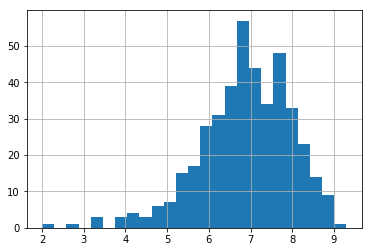

In [54]:
movies['IMDB_Rating'].hist(bins=25)

When analyzing a problem, it is useful to examine the relationship between the target value and the rest of the variables. For the purposes of this short example, we will explore the relationship between director and rating.

First we will select the two columns and group them by director, calculating the mean of the movies they have made.

In [80]:
directors = movies[['Director', 'IMDB_Rating']].groupby(['Director'], as_index=False).mean()

Let's plot the first five directors and their rating.

In [85]:
directors.head()

,Director,IMDB_Rating
0,Aaron Norris,4.85
1,Abel Ferrara,7.00
2,Alex Proyas,7.60
3,Alexander Witt,6.10
4,Alfonso Cuarón,7.90


We can also sort this array. Let's see the worst five directors, and then the best five.

In [100]:
directors.sort_values(['IMDB_Rating']).head()

,Director,IMDB_Rating
254,Uwe Boll,2.4
162,Marty Weiss,3.3
139,Keoni Waxman,3.4
61,Edward D. Wood Jr.,3.9
53,Dean Semler,4.0


In [101]:
directors.sort_values(['IMDB_Rating'], ascending=False).head()

,Director,IMDB_Rating
94,Irvin Kershner,8.80
12,Andy Wachowski|Lana Wachowski,8.70
130,Jonathan Demme,8.60
33,Christopher Nolan,8.54
68,Francis Ford Coppola,8.50


Indicatively, we will show a bar plot of five random directors against their rating.

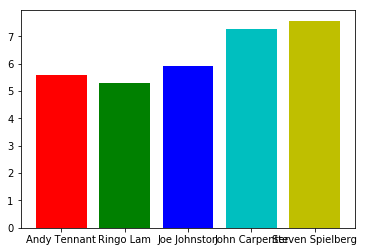

In [105]:
d = directors.sample(5)
colors = 'rgbcy'
plt.bar(d['Director'], d['IMDB_Rating'], color=colors)
plt.show()

As we can see, differernt directors provide different average ratings. That means looking at a director should be a good indicator of a movie's quality. For example, Christopher Nolan is making movies with an average rating of 8.54, so we can expect a future movie of his to be highly-rated as well. Of course, the analysis does not end here; this was merely a start.

## Assignment Questions

The questions in the above lab sheet need to be answered and handed in before 23:59 on 5th October 2018. The hand should be done via file upload through [MOLE](https://www.sheffield.ac.uk/cics/mole). 

## More Fun on the Python Data Farm

If you want to explore more of the things you can do with movies and python you might be interested in the `imdbpy` python library. 

You can try installing it using `easy_install` as follows.

In [ ]:
!easy_install -U IMDbPY

If this doesn't work on your machine, try following instructions on (http://imdbpy.sourceforge.net/)

Once you've installed `imdbpy` you can test it works with the following script, which should list movies with the word 'python' in their title. To run the code in the following box, simply click the box and press `SHIFT-enter` or `CTRL-enter`. Then you can try running the code below.

In [ ]:
from IMDbPY import IMDb
ia = IMDb()

for movie in ia.search_movie('python'):
    print(movie) 

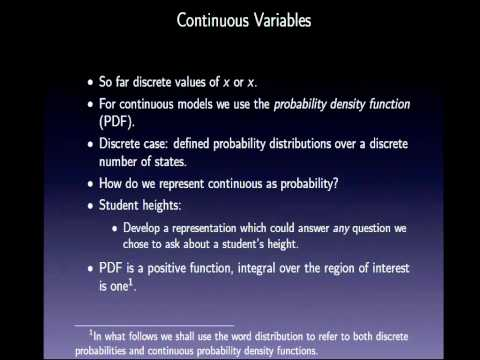

In [32]:
from IPython.display import YouTubeVideo
YouTubeVideo('GX8VLYUYScM')